In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:/Users/javva/Downloads/insurance-predictor/data/insurance.csv")


df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
for col in ['sex', 'smoker', 'region']:
    print(f"{col}: {df[col].unique()}")


sex: ['female' 'male']
smoker: ['yes' 'no']
region: ['southwest' 'southeast' 'northwest' 'northeast']


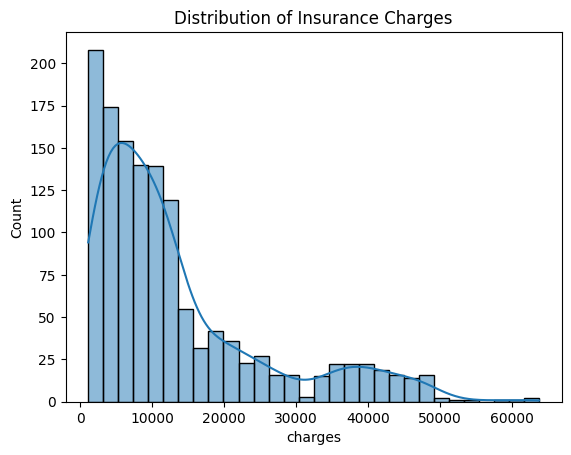

In [6]:
sns.histplot(df['charges'], kde=True)
plt.title("Distribution of Insurance Charges")
plt.show()


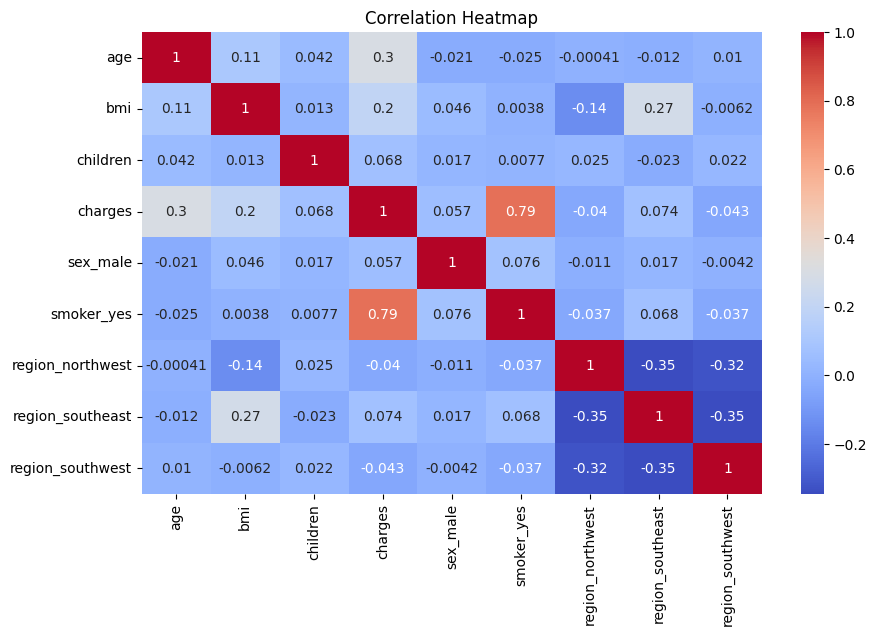

In [7]:
df_encoded = pd.get_dummies(df, drop_first=True)
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


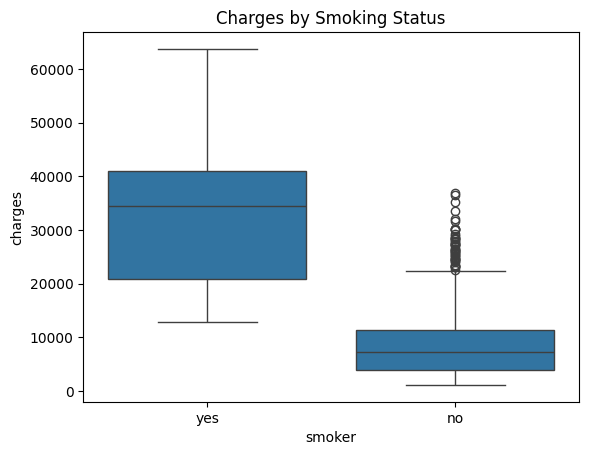

In [8]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Charges by Smoking Status")
plt.show()


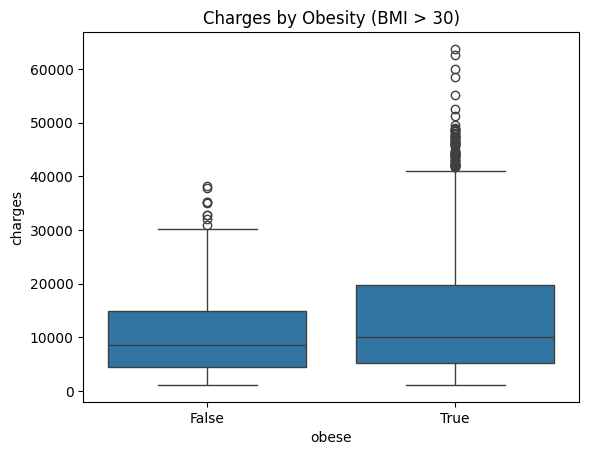

In [9]:
df['obese'] = df['bmi'] > 30
sns.boxplot(x='obese', y='charges', data=df)
plt.title("Charges by Obesity (BMI > 30)")
plt.show()


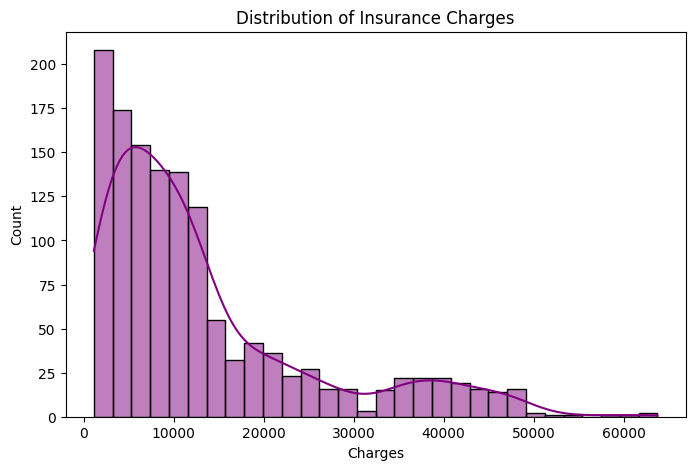

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df['charges'], kde=True, color='purple')
plt.title("Distribution of Insurance Charges")
plt.xlabel("Charges")
plt.ylabel("Count")
plt.show()


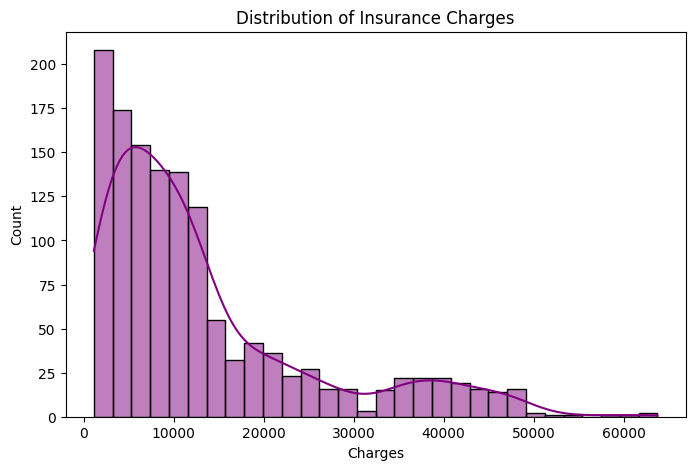

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df['charges'], kde=True, color='purple')
plt.title("Distribution of Insurance Charges")
plt.xlabel("Charges")
plt.ylabel("Count")
plt.show()


C:\Users\javva\AppData\Local\Temp\ipykernel_5152\467496680.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='charges', data=df, palette='Set2')


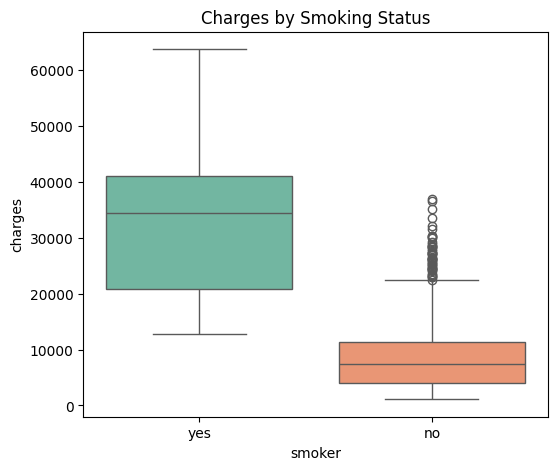

In [12]:
plt.figure(figsize=(6,5))
sns.boxplot(x='smoker', y='charges', data=df, palette='Set2')
plt.title("Charges by Smoking Status")
plt.show()


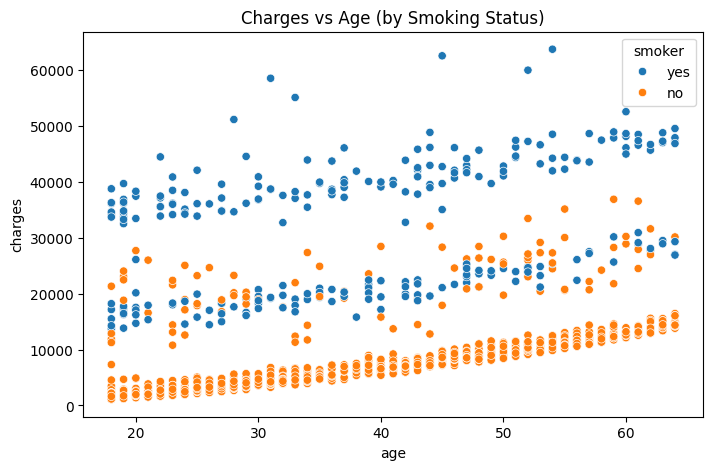

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='charges', data=df, hue='smoker')
plt.title("Charges vs Age (by Smoking Status)")
plt.show()


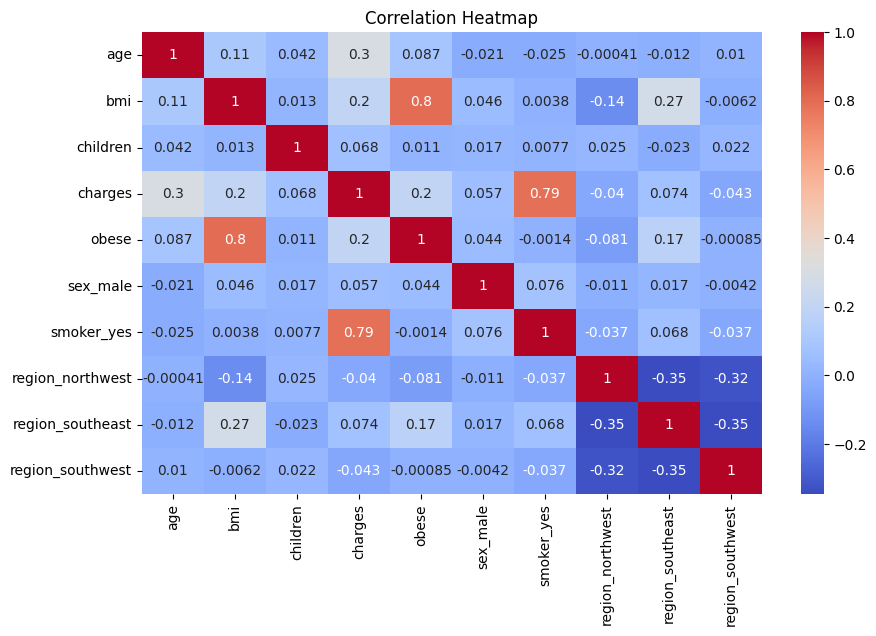

In [14]:
df_encoded = pd.get_dummies(df, drop_first=True)

plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


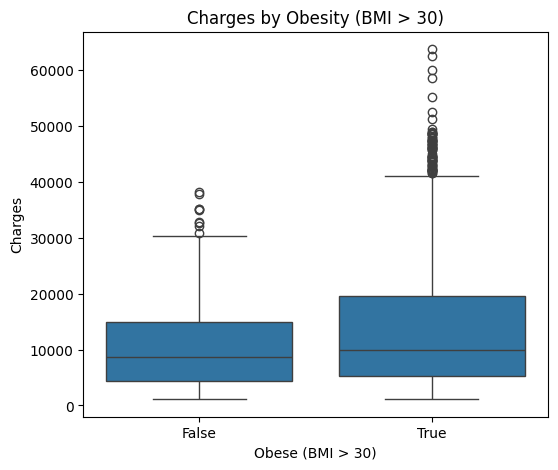

In [15]:
df['obese'] = df['bmi'] > 30

plt.figure(figsize=(6,5))
sns.boxplot(x='obese', y='charges', data=df)
plt.title("Charges by Obesity (BMI > 30)")
plt.xlabel("Obese (BMI > 30)")
plt.ylabel("Charges")
plt.show()


In [16]:
# Drop the 'obese' column for now (optional)
df = df.drop('obese', axis=1)

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [17]:
X = df_encoded.drop('charges', axis=1)  # features
y = df_encoded['charges']               # target


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [20]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = XGBRegressor()
model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = model.predict(X_test_scaled)


In [22]:
from sklearn.metrics import mean_squared_error, r2_score

# R² Score (higher is better)
r2 = r2_score(y_test, y_pred)

# RMSE (manual method for compatibility)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")



R² Score: 0.8491
RMSE: 4840.94


In [23]:
import pickle

# Save model
with open("../model/model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save scaler
with open("../model/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
